Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Load dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ML/Praktikum6/data/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset (1).csv')
print(df.head())
print(df.info())


   age  weight  height exercise  sleep sugar_intake smoking alcohol married  \
0   56      67     195      low    6.1       medium     yes     yes     yes   
1   69      76     170     high    6.9         high      no      no      no   
2   46     106     153     high    6.6          low     yes      no      no   
3   32      54     186   medium    8.5       medium      no      no      no   
4   60      98     195     high    8.0          low      no      no     yes   

      profession   bmi health_risk  
0  office_worker  17.6        high  
1        teacher  26.3        high  
2         artist  45.3        high  
3         artist  15.6         low  
4        teacher  25.8        high  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 

Preprocessing Data

In [3]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

print(df.head())


   age  weight  height  exercise  sleep  sugar_intake  smoking  alcohol  \
0   56      67     195         1    6.1             2        1        1   
1   69      76     170         0    6.9             0        0        0   
2   46     106     153         0    6.6             1        1        0   
3   32      54     186         2    8.5             2        0        0   
4   60      98     195         0    8.0             1        0        0   

   married  profession   bmi  health_risk  
0        1           5  17.6            0  
1        0           7  26.3            0  
2        0           0  45.3            0  
3        0           0  15.6            1  
4        1           7  25.8            0  


Pisahkan Fitur dan Label

In [5]:
X = df.drop('health_risk', axis=1)
y = df['health_risk']

Split Data (Training & Testing)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Standarisasi Data

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Bangun Model SVM

In [8]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)


SVC(C=1)

Evaluasi Model

In [9]:
y_pred = svm_model.predict(X_test)

print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi Model: 0.866

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       708
           1       0.79      0.74      0.76       292

    accuracy                           0.87      1000
   macro avg       0.84      0.83      0.83      1000
weighted avg       0.86      0.87      0.86      1000



Confusion Matrix

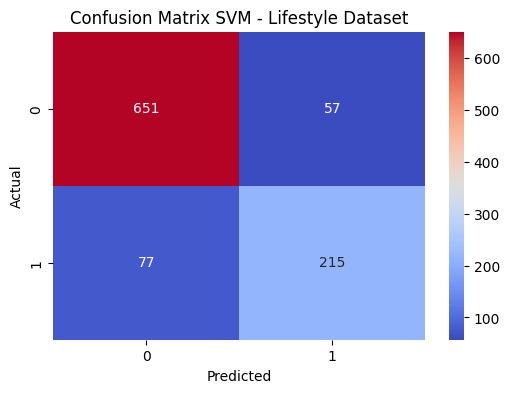

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix SVM - Lifestyle Dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
